# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their bank loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default. 

- NT is the abbreviation for New Taiwain. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked in your pair.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [393]:
# import libraries
import pickle
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# data viz packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.feature_selection import RFECV

## Data Cleaning

In [394]:
df = pd.read_csv('./data/training_data.csv' , index_col=0)

In [395]:
df.head() # preview dataset

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
28835,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1


In [396]:
df.shape

(22500, 24)

In [397]:
# view all columns
pd.options.display.max_columns = 24

Look at value counts to really get an of any odd values in each column.

In [398]:
# loop over each column and display value counts
for col in df.columns:
    print('\n') # space between each output
    print(col, df[col].value_counts())



X1 50000        2534
20000        1488
30000        1223
80000        1210
200000       1134
             ... 
327680          1
1000000         1
740000          1
800000          1
LIMIT_BAL       1
Name: X1, Length: 81, dtype: int64


X2 2      13572
1       8927
SEX        1
Name: X2, dtype: int64


X3 2            10516
1             7919
3             3713
5              208
4               90
6               42
0               11
EDUCATION        1
Name: X3, dtype: int64


X4 2           12026
1           10195
3             234
0              44
MARRIAGE        1
Name: X4, dtype: int64


X5 29     1243
27     1100
28     1064
30     1026
26      959
25      904
31      902
32      878
33      874
34      859
24      851
35      841
36      812
37      799
38      720
39      703
23      690
40      656
41      613
42      597
44      512
43      495
45      462
46      421
22      420
47      340
48      339
49      326
50      298
51      269
53      241
52      236
54      

There is definetly an odd row lower in the dataset that looks like it maybe a column label or something, it its definetly NOT a customer. Lets find that.

Need to find a better way to do this so process can be replicated on holdout set. 

In [399]:
# check out column name row
df.iloc[18381]

X1                      LIMIT_BAL
X2                            SEX
X3                      EDUCATION
X4                       MARRIAGE
X5                            AGE
X6                          PAY_0
X7                          PAY_2
X8                          PAY_3
X9                          PAY_4
X10                         PAY_5
X11                         PAY_6
X12                     BILL_AMT1
X13                     BILL_AMT2
X14                     BILL_AMT3
X15                     BILL_AMT4
X16                     BILL_AMT5
X17                     BILL_AMT6
X18                      PAY_AMT1
X19                      PAY_AMT2
X20                      PAY_AMT3
X21                      PAY_AMT4
X22                      PAY_AMT5
X23                      PAY_AMT6
Y      default payment next month
Name: ID, dtype: object

In [400]:
# make row 18381 column header and all lower case 
header_row = 18381
df.columns = df.iloc[header_row].str.lower()

In [401]:
# drop row 18381
df.drop(df.index[18381], inplace=True)

In [402]:
df.shape

(22499, 24)

In [403]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month'],
      dtype='object', name='ID')

In [404]:
# check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22499 entries, 28835 to 7624
Data columns (total 24 columns):
limit_bal                     22499 non-null object
sex                           22499 non-null object
education                     22499 non-null object
marriage                      22499 non-null object
age                           22499 non-null object
pay_0                         22499 non-null object
pay_2                         22499 non-null object
pay_3                         22499 non-null object
pay_4                         22499 non-null object
pay_5                         22499 non-null object
pay_6                         22499 non-null object
bill_amt1                     22499 non-null object
bill_amt2                     22499 non-null object
bill_amt3                     22499 non-null object
bill_amt4                     22499 non-null object
bill_amt5                     22499 non-null object
bill_amt6                     22499 non-null object
pay_amt1 

No missing values, however every column is an object dtype, should `limit_bal`, `age` and `bill_amt1` through `pay_6` be converted to numerical dtypes? Let's do that. 

### Numeric Features

Some dtypes should be numeric, create list of those and convert now.

In [405]:
# create list of columns that will be converted to numeric
cols = ['limit_bal','age','bill_amt1', 'bill_amt2', 'bill_amt3',
        'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2',
        'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default payment next month']

# use .apply method to convert cols to numeric
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22499 entries, 28835 to 7624
Data columns (total 24 columns):
limit_bal                     22499 non-null int64
sex                           22499 non-null object
education                     22499 non-null object
marriage                      22499 non-null object
age                           22499 non-null int64
pay_0                         22499 non-null object
pay_2                         22499 non-null object
pay_3                         22499 non-null object
pay_4                         22499 non-null object
pay_5                         22499 non-null object
pay_6                         22499 non-null object
bill_amt1                     22499 non-null int64
bill_amt2                     22499 non-null int64
bill_amt3                     22499 non-null int64
bill_amt4                     22499 non-null int64
bill_amt5                     22499 non-null int64
bill_amt6                     22499 non-null int64
pay_amt1         

In [407]:
# take a look at summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,,,,,,,,
limit_bal,22499.00,167054.52,129864.96,10000.00,50000.00,140000.00,240000.00,1000000.00
age,22499.00,35.45,9.24,21.00,28.00,34.00,41.00,75.00
bill_amt1,22499.00,51455.87,74470.26,-165580.00,3506.00,22387.00,66988.50,964511.00
bill_amt2,22499.00,49385.31,71953.81,-69777.00,2975.00,21145.00,63755.00,983931.00
bill_amt3,22499.00,47042.13,69917.92,-157264.00,2611.50,20053.00,60161.00,1664089.00
bill_amt4,22499.00,43329.15,64607.09,-81334.00,2319.50,19048.00,54494.50,891586.00
bill_amt5,22499.00,40306.37,60918.99,-81334.00,1732.50,18050.00,50196.00,927171.00
bill_amt6,22499.00,38955.00,59773.14,-339603.00,1230.00,16924.00,49250.00,961664.00
pay_amt1,22499.00,5627.91,16628.16,0.00,1000.00,2100.00,5002.00,873552.00


There are a bunch of min negative values in the `bill_amt` columns. This doesn't make sense to me, how can you have a negative bill? Also, wondering if max values for `bill_amt`, `limit_bal`, and `pay_amt` columns, should be bought down to within a certain amount of standard deviations away from the mean. 

- Do something to handle negative values in `bill_amt` columns, perhaps map all negative values to 0.00?
- Scale down outliers within 6 std away from mean for `bill_amt`, `limit_bal`, and `pay_amt` columns

In [408]:
# list columns that have large variances
outlier_cols = ['limit_bal','bill_amt1', 'bill_amt2', 'bill_amt3',
        'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2',
        'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

# loop over columns and anything above or under 6 std coerce them to 6 std respectively
for feat in outlier_cols:
    feat_mean = df[feat].mean()
    feat_std = df[feat].std()
    above_6std = feat_mean + 6 * feat_std
    below_6std = feat_mean - 6 * feat_std
    df[feat] = \
        np.where(df[feat] > above_6std, feat_mean + 6 * feat_std,
                np.where(df[feat] < below_6std, feat_mean - 6 * feat_std, df[feat]))

In [409]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,,,,,,,,
limit_bal,22499.00,167052.13,129850.13,10000.00,50000.00,140000.00,240000.00,946244.28
age,22499.00,35.45,9.24,21.00,28.00,34.00,41.00,75.00
bill_amt1,22499.00,51339.54,73632.62,-165580.00,3506.00,22387.00,66988.50,498277.41
bill_amt2,22499.00,49258.40,71026.84,-69777.00,2975.00,21145.00,63755.00,481108.20
bill_amt3,22499.00,46863.38,68227.04,-157264.00,2611.50,20053.00,60161.00,466549.65
bill_amt4,22499.00,43179.45,63507.84,-81334.00,2319.50,19048.00,54494.50,430971.68
bill_amt5,22499.00,40168.27,59857.59,-81334.00,1732.50,18050.00,50196.00,405820.33
bill_amt6,22499.00,38822.16,58741.21,-319683.87,1230.00,16924.00,49250.00,397593.87
pay_amt1,22499.00,5274.66,11361.79,0.00,1000.00,2100.00,5002.00,105396.89


#### Categorical Features

Convert categorical variables in category data type.

In [410]:
print('Object dtypes to be converted to category')
print('\n')
print(df.select_dtypes(['object']).columns)

Object dtypes to be converted to category


Index(['sex', 'education', 'marriage', 'pay_0', 'pay_2', 'pay_3', 'pay_4',
       'pay_5', 'pay_6'],
      dtype='object', name='ID')


In [411]:
# convert objects to category dtype
objcat = ['sex', 'education', 'marriage', 'pay_0', 'pay_2', 'pay_3', 'pay_4',
       'pay_5', 'pay_6']

for colname in objcat:
    df[colname] = df[colname].astype('category')

## Import income by demographics dataset

In [412]:
# set options to display floats with two decimal place
pd.set_option('display.float_format', '{:.2f}'.format)

In [413]:
# read in income demographical dataset
df2 = pd.read_excel('./data/income_sex_age_edu.xls', 
                    sheet_name='125,126', 
                    usecols='C,H', 
                    header=7, 
                    skiprows=2, 
                    nrows=20)

In [414]:
df2

,income,Unnamed: 7
0,nan,NaN
1,513477.28,All income recipients
2,nan,Sex
3,568403.33,Male
4,424122.21,Female
5,nan,Age
6,376191.94,Under 30 years
7,510716.67,30 ～ 34 years
8,571059.58,35 ～ 39 years
9,593171.35,40 ～ 44 years


In [415]:
# create new df without na rows
df2 = df2[df2['income'].notna()]

**Values from df to be matched with df2**

_Gender_ (1 = male; 2 = female).

_Education_ (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- graduate school (1) = college and above
- university (2) = junior college
- high school (3) = high school
- other (4) = a weighted average of: senior vocational school, junior middle and primary school and below

_Age_ (year).
- bin into values specificed by df2


In [416]:
# transpose income df
df2 = df2.T

In [417]:
df2

,1,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19
income,513477.28,568403.33,424122.21,376191.94,510716.67,571059.58,593171.35,613474.19,557730.70,362868.01,350928.94,443357.16,514627.59,481232.09,619845.27,715520.26
Unnamed: 7,All income recipients,Male,Female,Under 30 years,30 ～ 34 years,35 ～ 39 years,40 ～ 44 years,45 ～ 54 years,55 ～ 64 years,65 years and over,Primary school and below,Junior middle (vocational),High school,Senior vocational school,Junior college,College and above


In [418]:
# assign variable row as header
df2.columns = df2.iloc[1]

In [419]:
# delete row 1
df2.drop(df2.index[1], axis=0, inplace=True)

In [420]:
df2.columns

Index(['All income recipients', '　　Male', '　　Female', '　　Under 30 years',
       '　　30 ～ 34 years', '　　35 ～ 39 years', '　　40 ～ 44 years',
       '　　45 ～ 54 years', '　　55 ～ 64 years', '　　65 years and over',
       '　　Primary school and below', '　　Junior middle (vocational)',
       '　　High school', '　　Senior vocational school', '　　Junior college',
       '　　College and above'],
      dtype='object', name='Unnamed: 7')

In [421]:
# strip leading or trailing spaces in column headers
df2.columns = df2.columns.str.strip()

In [422]:
# rename columns

df2.rename(columns={'All income recipients': 'avg_income_all', 'Male':'male', 'Female':'female', 'Under 30 years':'under_30',
       '30 ～ 34 years':'30_34yo', '35 ～ 39 years':'35_39yo', '40 ～ 44 years':'40_44yo','45 ～ 54 years':'45_54yo', 
       '55 ～ 64 years':'55_64yo', '65 years and over':'65plus','Primary school and below':'prim_school_below', 
       'Junior middle (vocational)':'jun_mid_voc','High school':'hs', 'Senior vocational school':'sen_voc', 
       'Junior college':'jun_coll','College and above':'coll_above'}, inplace=True)

In [423]:
df2

Unnamed: 7,avg_income_all,male,female,under_30,30_34yo,35_39yo,40_44yo,45_54yo,55_64yo,65plus,prim_school_below,jun_mid_voc,hs,sen_voc,jun_coll,coll_above
income,513477.28,568403.33,424122.21,376191.94,510716.67,571059.58,593171.35,613474.19,557730.70,362868.01,350928.94,443357.16,514627.59,481232.09,619845.27,715520.26


In [424]:
# merge avg income sex
df['avg_income_sex'] = \
    np.where(df['sex'] == '1', df2['male'].values, 
             np.where(df['sex'] == '2', int(df2['female'].values), df['sex']))

In [425]:
# merge avg income age
age_cols = ['under_30', '30_34yo', '35_39yo','40_44yo', '45_54yo', '55_64yo', '65plus']

# np.select conditions
age_conditions = [
    (df['age'] < 30),
    (df['age'] >= 30) & (df['age'] <= 34),
    (df['age'] >= 35) & (df['age'] <= 39),
    (df['age'] >= 40) & (df['age'] <= 44),
    (df['age'] >= 45) & (df['age'] <= 54),
    (df['age'] >= 55) & (df['age'] <= 64),
    (df['age'] >= 65)
]

#np.select values
age_values = [
    df2['under_30'].values, 
    df2['30_34yo'].values, 
    df2['35_39yo'].values, 
    df2['40_44yo'].values, 
    df2['45_54yo'].values, 
    df2['55_64yo'].values, 
    df2['65plus'].values
]

# loop over age_cols to populate new column with np.select
for age in age_cols:
    df['avg_income_age'] = np.select(age_conditions, age_values)

In [426]:
# merge education columns 
edu_cols = ['prim_school_below','jun_mid_voc', 'hs', 'sen_voc', 'jun_coll', 'coll_above']

# conditions
edu_conditions =[
    (df['education'] == '0'),
    (df['education'] == '1'),
    (df['education'] == '2'),
    (df['education'] == '3'),
    (df['education'] == '4'),
    (df['education'] == '5'),
    (df['education'] == '6')
]

# values
edu_values = [
    df2[['sen_voc', 'jun_mid_voc', 'prim_school_below']].values.mean(), 
    df2['coll_above'].values,
    df2['jun_coll'].values,
    df2['hs'].values,
    df2[['sen_voc', 'jun_mid_voc', 'prim_school_below']].values.mean(),
    df2[['sen_voc', 'jun_mid_voc', 'prim_school_below']].values.mean(),
    df2[['sen_voc', 'jun_mid_voc', 'prim_school_below']].values.mean() 
]
    
for edu in edu_cols:
    df['avg_income_edu'] = np.select(edu_conditions, edu_values)

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

In [427]:
df.head()

ID,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,...,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month,avg_income_sex,avg_income_age,avg_income_edu
28835,220000.00,2,1,2,36,0,0,0,0,0,0,222598.00,...,181859.00,184605.00,10000.00,8018.00,10121.00,6006.00,10987.00,112601.24,1,424122,571059.58,715520.26
25329,200000.00,2,3,2,29,-1,-1,-1,-1,-1,-1,326.00,...,326.00,326.00,326.00,326.00,326.00,326.00,326.00,326.00,0,424122,376191.94,514627.59
18894,180000.00,2,1,2,27,-2,-2,-2,-2,-2,-2,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,424122,376191.94,715520.26
690,80000.00,1,2,2,32,0,0,0,0,0,0,51372.00,...,42256.00,42527.00,1853.00,1700.00,1522.00,1548.00,1488.00,1500.00,0,568403.33,510716.67,619845.27
6239,10000.00,1,2,2,27,0,0,0,0,0,0,8257.00,...,2639.00,2697.00,2000.00,1100.00,600.00,300.00,300.00,1000.00,1,568403.33,376191.94,619845.27


## EDA

### Target Variable

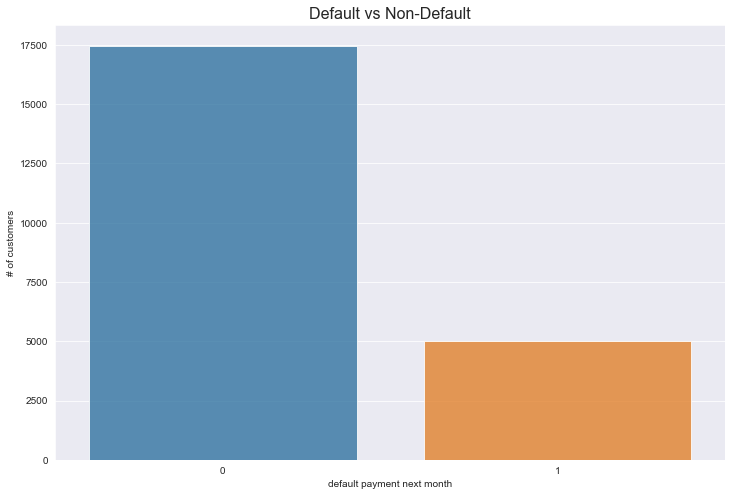

In [428]:
plt.figure(figsize=(12,8))
sns.countplot(df['default payment next month'], alpha = .80)
plt.title('Default vs Non-Default', fontsize=16)
plt.ylabel('# of customers')
plt.show()

In [429]:
print(df['default payment next month'].value_counts(normalize=True))
print('\n')
print(df['default payment next month'].value_counts())

0   0.78
1   0.22
Name: default payment next month, dtype: float64


0    17471
1     5028
Name: default payment next month, dtype: int64


**Observations Target Variable**
- The majority of customers or **78%** did NOT default on their credit card payment for next month

### Target vs Numeric Features

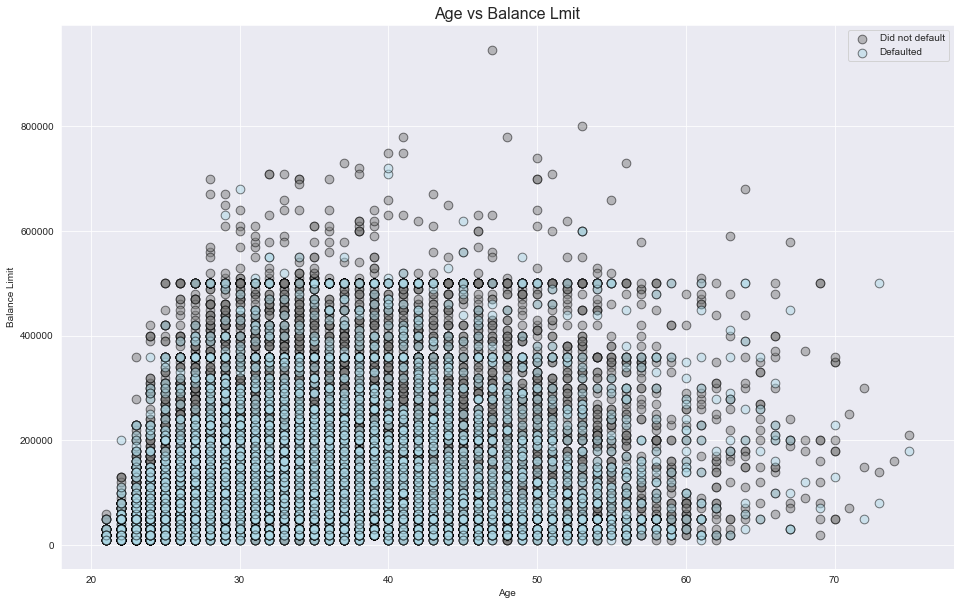

In [430]:
# Plot Age vs. Balance Limit
fig = plt.figure(figsize=(16,10))

ax1 = fig.add_subplot()
ax1.scatter(
    x = df[df['default payment next month'] == 0].age, 
    y = df[df['default payment next month'] == 0].limit_bal,
    alpha = .50, edgecolor = 'black', c = 'grey', s = 75,
    label = 'Did not default')

ax1.scatter(
    x = df[df['default payment next month'] == 1].age,
    y = df[df['default payment next month'] == 1].limit_bal,
    alpha = .50, edgecolors = 'black', c = 'lightblue', s = 75,
    label = 'Defaulted')
ax1.set_title('Age vs Balance Lmit', fontsize=16)
ax1.set_ylabel('Balance Limit')
ax1.set_xlabel('Age')
ax1.legend()

plt.show()


In [431]:
print('Statistical summary of Age and Balance Limit')
print('\n')
print('Defaulted')
print(df[df['default payment next month']==0][['age', 'limit_bal']].describe().T)
print('\n')
print('Non-default')
print(df[df['default payment next month']==1][['age', 'limit_bal']].describe().T)

Statistical summary of Age and Balance Limit


Defaulted
             count      mean       std      min      25%       50%       75%  \
ID                                                                             
age       17471.00     35.38      9.07    21.00    28.00     34.00     41.00   
limit_bal 17471.00 177916.45 131689.80 10000.00 60000.00 150000.00 250000.00   

                max  
ID                   
age           75.00  
limit_bal 946244.28  


Non-default
            count      mean       std      min      25%      50%       75%  \
ID                                                                           
age       5028.00     35.70      9.80    21.00    28.00    34.00     42.00   
limit_bal 5028.00 129301.45 115571.18 10000.00 50000.00 90000.00 190000.00   

                max  
ID                   
age           75.00  
limit_bal 720000.00  


**Age vs Balance Limit**

- Not much difference between mean age of those who defaulted or did not default
- Higher balance limit correlates with default 177k vs. 123k

### Bill amount distributions

Vanilla model is basically just predicting everyone did not default, therefore accuracy is 77% and all other scores besides precision are non-existent.

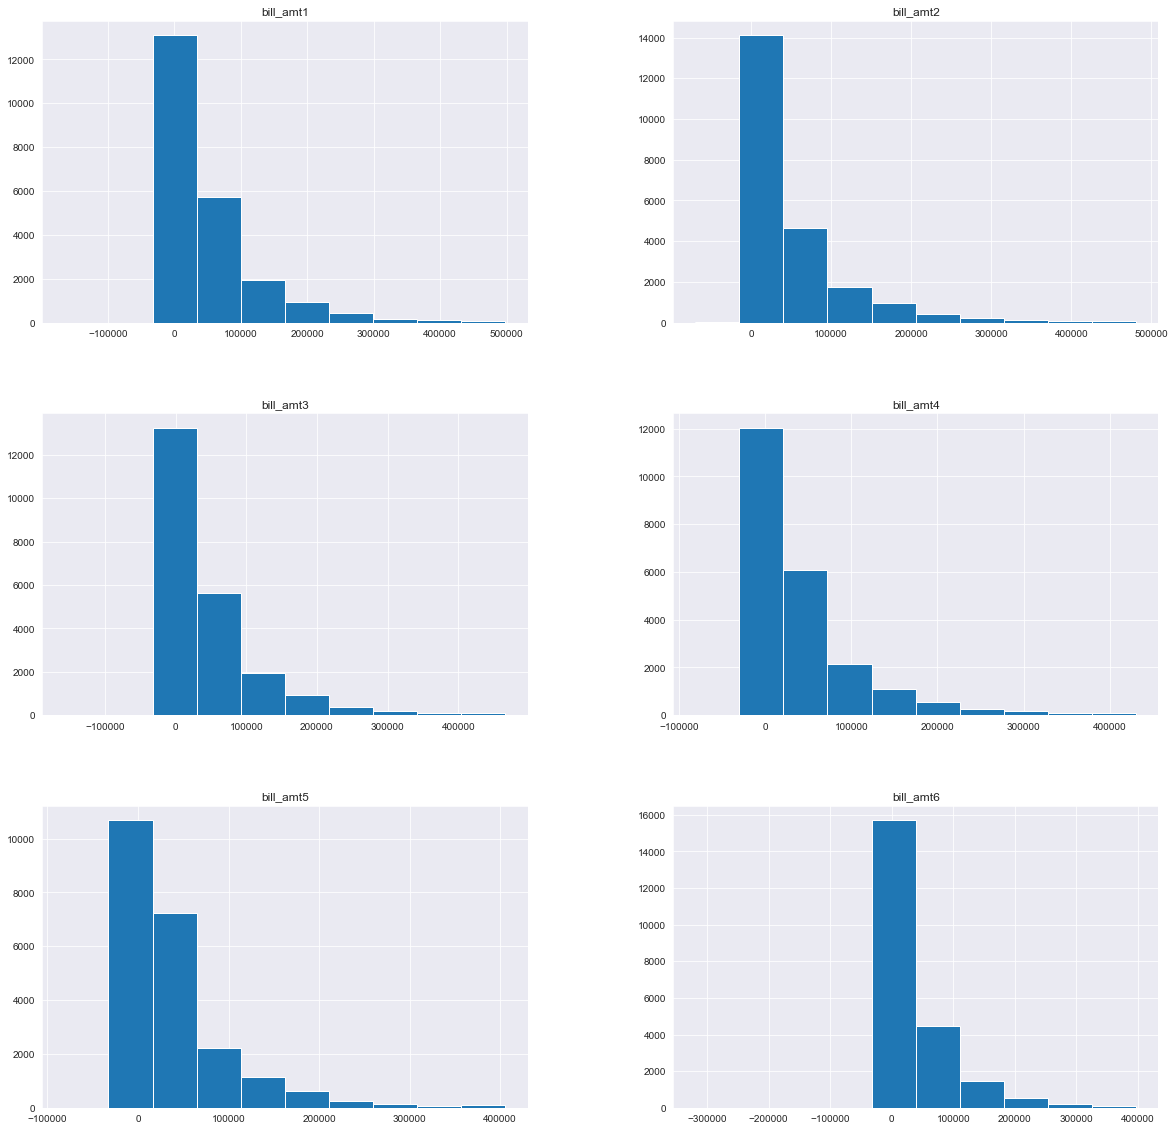

In [432]:
# create list for bill amount columns
bill_col = ['bill_amt1', 'bill_amt2','bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']

# look at histograms for distributions of bill amounts
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
df[bill_col].hist(ax = ax);

### Observations
- Most bill amounts for the 6 months prior were 0 by far
- A few major outliers skew the distribution

## Pay amount distributions

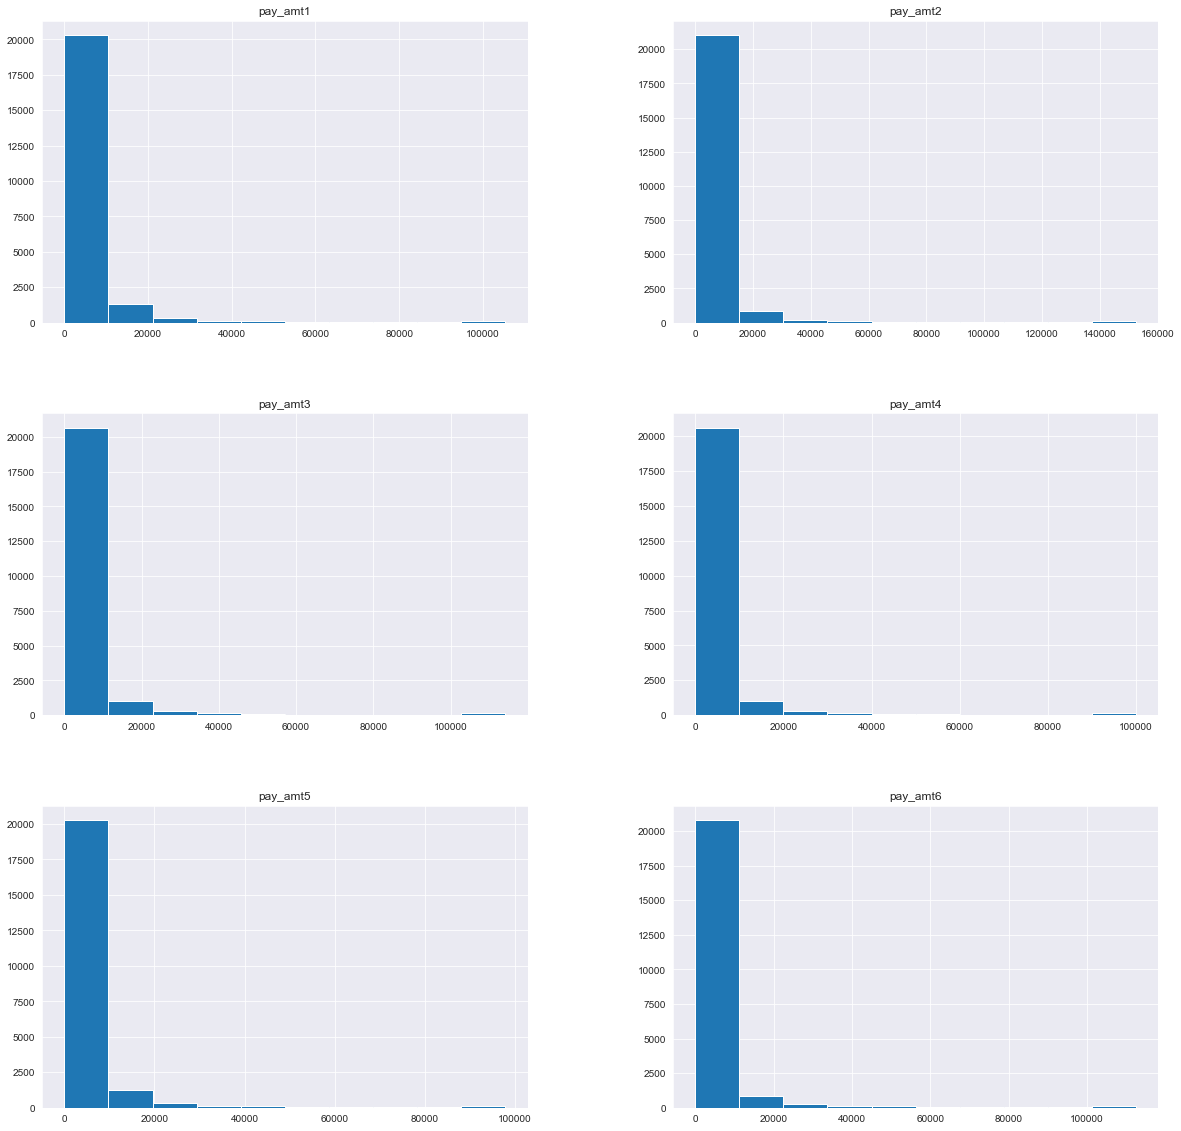

In [433]:
# create list for pay amount columns
pay_col = ['pay_amt1','pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

# look at histograms for distributions of bill amounts
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
df[pay_col].hist(ax = ax);

### Observations
- Most payment amounts were under 1000
- Distribution is very skewed, meaning outliers cause and issue. 
- may need to log transform to get distributions normal
- also could be interesting to zip each bill amount with pay amount in a bar graph, with default and not
- or make scatter plots of bill amt vs bill pay and default not default.

In [434]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month', 'avg_income_sex', 'avg_income_age',
       'avg_income_edu'],
      dtype='object', name='ID')

### Categorical features

In [435]:
df.select_dtypes(['category']).columns

Index(['sex', 'education', 'marriage', 'pay_0', 'pay_2', 'pay_3', 'pay_4',
       'pay_5', 'pay_6'],
      dtype='object', name='ID')

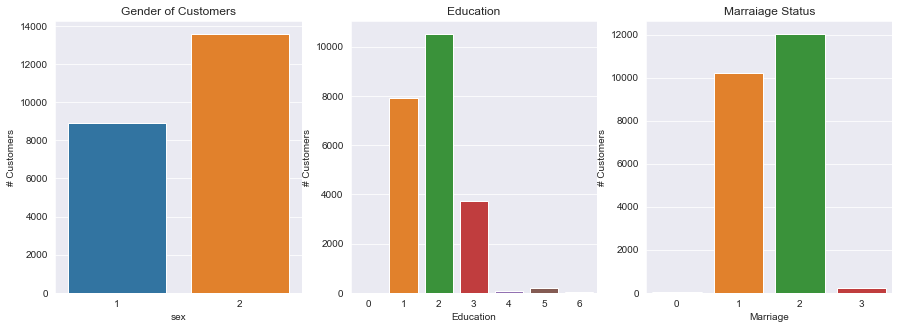

In [436]:
# Suplots of categorical features
f, axes = plt.subplots(1,3, figsize = (15,5))

# Plot [0]
sns.countplot(x = 'sex', data = df, ax = axes[0])
axes[0].set_xlabel('sex')
axes[0].set_ylabel('# Customers')
axes[0].set_title('Gender of Customers')

# Plot [1]
sns.countplot(x = 'education', data = df, ax = axes[1])
axes[1].set_xlabel('Education')
axes[1].set_ylabel('# Customers')
axes[1].set_title('Education')

# Plot [2]
sns.countplot( x = 'marriage', data = df, ax =  axes[2])
axes[2].set_xlabel('Marriage')
axes[2].set_ylabel('# Customers')
axes[2].set_title('Marraiage Status')

plt.show()

**Observations**
- Customers where mostly female
- Education level was mostly (2) = university, followed by (1) = graduate school
- Marriage status was primarily (2) single, but closely followed by (1) married. 

### Target vs. Categorical Features

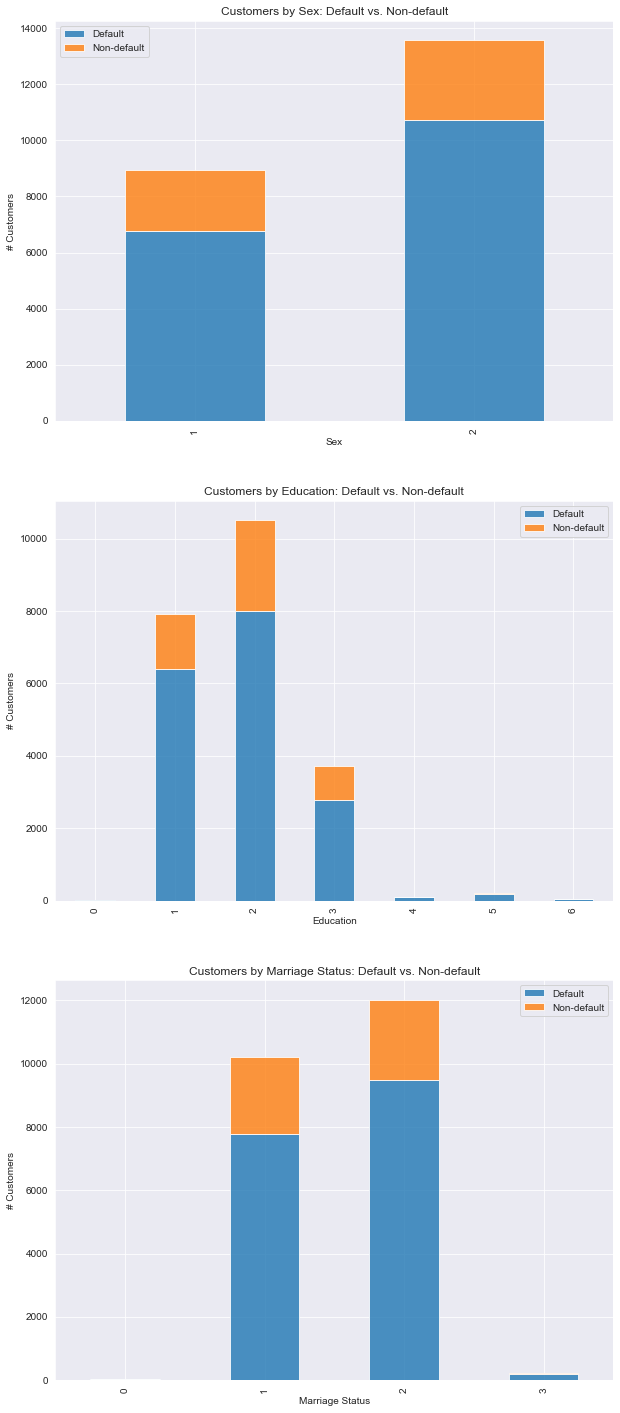

In [437]:
# subplots of categorical vs default
fig, axes = plt.subplots(3, 1, figsize= (10,25))

# sex vs. target
sex = df.groupby(['sex', 'default payment next month']).sex.count().unstack()

p1 = sex.plot(
    kind='bar', stacked = True, title = 'Customers by Sex: Default vs. Non-default', 
    alpha=.80, ax = axes[0])
p1.set_xlabel('Sex')
p1.set_ylabel('# Customers')
p1.legend(['Default', 'Non-default'])

# edu vs target
edu = df.groupby(['education', 'default payment next month']).education.count().unstack()

p2 = edu.plot(
    kind='bar', stacked = True, title = 'Customers by Education: Default vs. Non-default', 
    alpha=.80, ax = axes[1])
p2.set_xlabel('Education')
p2.set_ylabel('# Customers')
p2.legend(['Default', 'Non-default'])


# marriage vs target
sex = df.groupby(['marriage', 'default payment next month']).sex.count().unstack()

s1 = sex.plot(
    kind='bar', stacked = True, title = 'Customers by Marriage Status: Default vs. Non-default', 
    alpha=.80, ax = axes[2])
s1.set_xlabel('Marriage Status')
s1.set_ylabel('# Customers')
s1.legend(['Default', 'Non-default'])

plt.show()

### Observations:
- If you are married, you have a greater chance of defaulting on next months payment then if you are single
- Education level is the biggest indicator here, if you have a university degree, yet no graduate degree you seem to  be more likely to default
- Sex does not have much effect on payment default

In [438]:
edu = df.groupby(['education', 'default payment next month']).size() / len(df)
edu

education  default payment next month
0          0                            0.00
1          0                            0.28
           1                            0.07
2          0                            0.36
           1                            0.11
3          0                            0.12
           1                            0.04
4          0                            0.00
           1                            0.00
5          0                            0.01
           1                            0.00
6          0                            0.00
           1                            0.00
dtype: float64

In [439]:
sex = df.groupby(['sex', 'default payment next month']).size() / len(df)
sex

sex  default payment next month
1    0                            0.30
     1                            0.10
2    0                            0.48
     1                            0.13
dtype: float64

In [440]:
marriage = df.groupby(['marriage', 'default payment next month']).size() / len(df)
marriage

marriage  default payment next month
0         0                            0.00
          1                            0.00
1         0                            0.35
          1                            0.11
2         0                            0.42
          1                            0.11
3         0                            0.01
          1                            0.00
dtype: float64

### Investigate relationship of previous payments to target

In [441]:

april = df.groupby(['pay_0', 'default payment next month']).pay_0.count().unstack()
april

default payment next month,0,1
pay_0,,
-1,3550.00,722.00
-2,1780.00,268.00
0,9589.00,1468.00
1,1841.00,909.00
2,618.00,1414.00
3,55.00,184.00
4,16.00,35.00
5,9.00,11.00
6,5.00,4.00


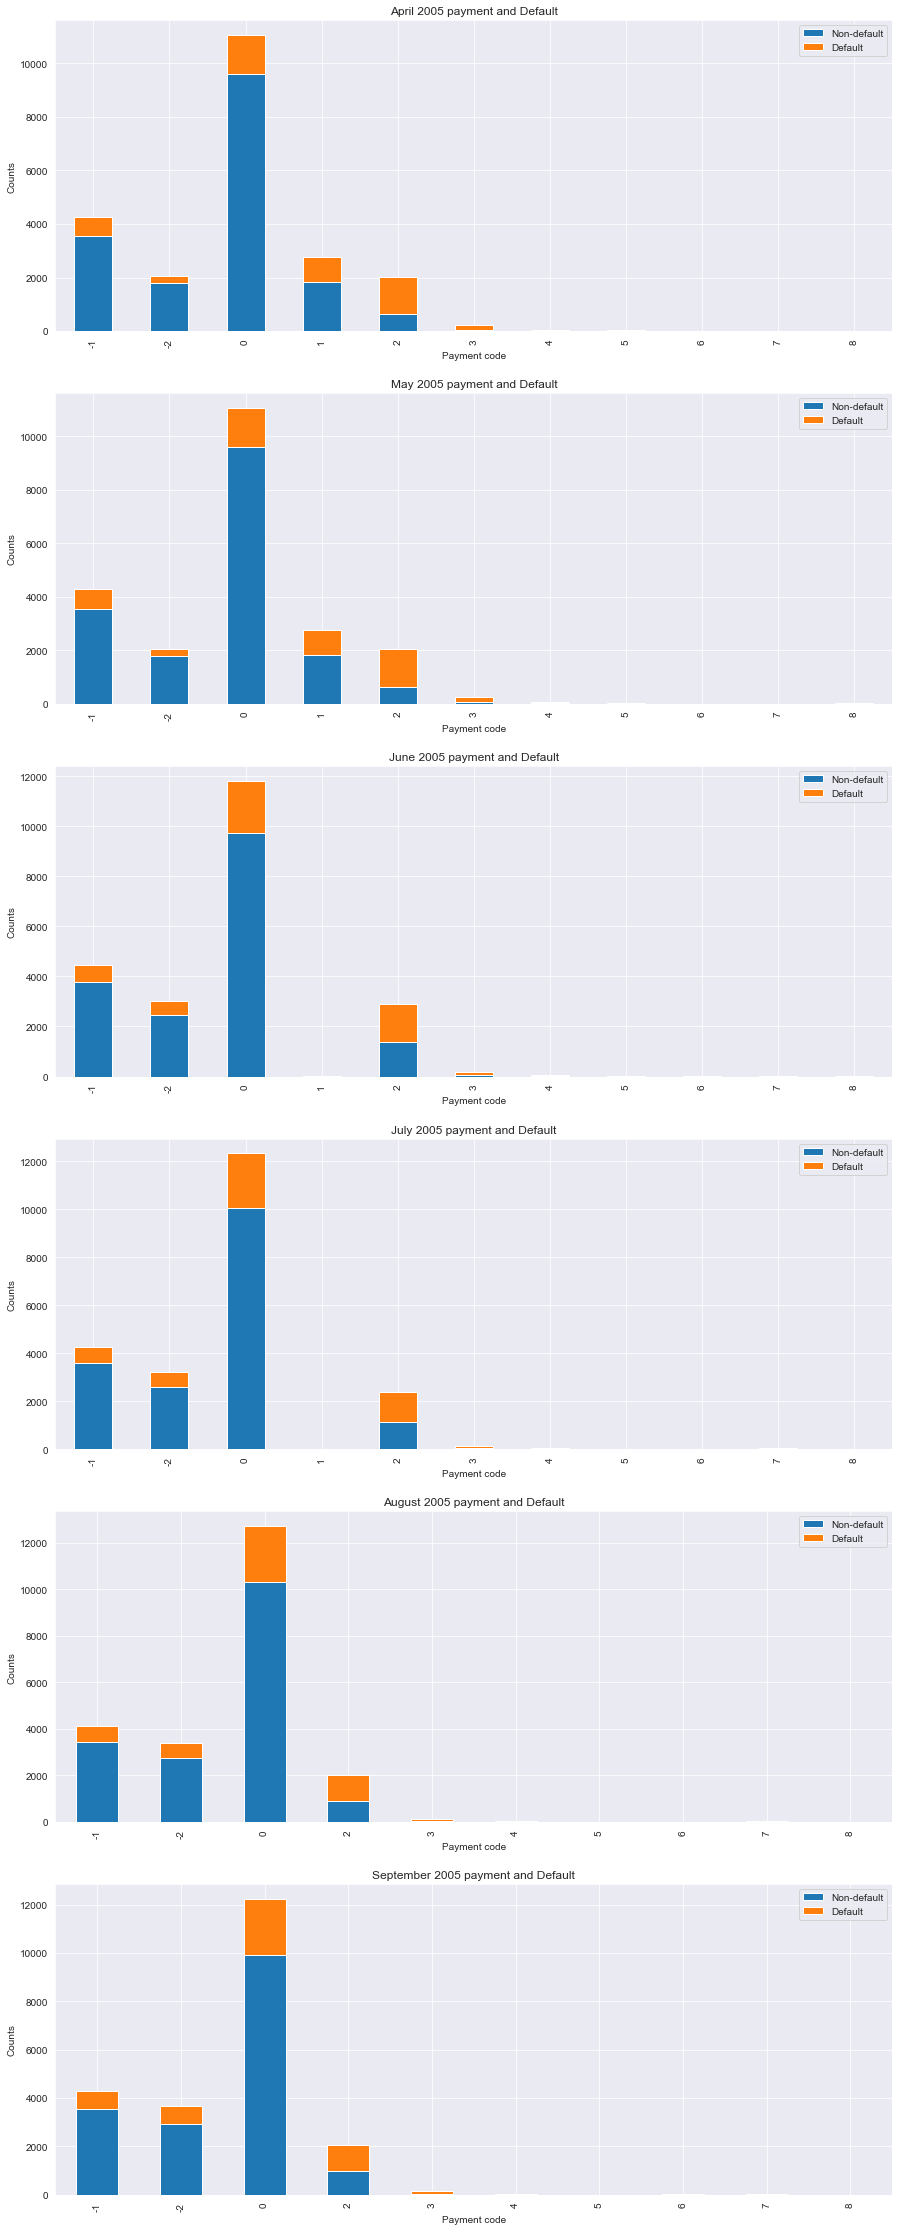

In [442]:
pay_cols = ['pay_0', 'pay_2','pay_3', 'pay_4', 'pay_5', 'pay_6']

fig, axes = plt.subplots(6,1, figsize = (15,40))

apr = df.groupby(['pay_0', 'default payment next month']).pay_0.count().unstack()
p1 = apr.plot(
    kind='bar', stacked = True, 
    title = 'April 2005 payment and Default', ax = axes[0])
p1.set_xlabel('Payment code')
p1.set_ylabel('Counts')
p1.legend(['Non-default', 'Default'])

may = df.groupby(['pay_0', 'default payment next month']).pay_2.count().unstack()
p1 = may.plot(
    kind='bar', stacked = True, 
    title = 'May 2005 payment and Default', ax = axes[1])
p1.set_xlabel('Payment code')
p1.set_ylabel('Counts')
p1.legend(['Non-default', 'Default'])

jun = df.groupby(['pay_3', 'default payment next month']).pay_3.count().unstack()
p1 = jun.plot(
    kind='bar', stacked = True, 
    title = 'June 2005 payment and Default', ax = axes[2])
p1.set_xlabel('Payment code')
p1.set_ylabel('Counts')
p1.legend(['Non-default', 'Default'])

jul = df.groupby(['pay_4', 'default payment next month']).pay_4.count().unstack()
p1 = jul.plot(
    kind='bar', stacked = True, 
    title = 'July 2005 payment and Default', ax = axes[3])
p1.set_xlabel('Payment code')
p1.set_ylabel('Counts')
p1.legend(['Non-default', 'Default'])

aug = df.groupby(['pay_5', 'default payment next month']).pay_5.count().unstack()
p1 = aug.plot(
    kind='bar', stacked = True, 
    title = 'August 2005 payment and Default', ax = axes[4])
p1.set_xlabel('Payment code')
p1.set_ylabel('Counts')
p1.legend(['Non-default', 'Default'])

sept = df.groupby(['pay_6', 'default payment next month']).pay_6.count().unstack()
p1 = sept.plot(
    kind='bar', stacked = True, 
    title = 'September 2005 payment and Default', ax = axes[5])
p1.set_xlabel('Payment code')
p1.set_ylabel('Counts')
p1.legend(['Non-default', 'Default'])

plt.show()

**Observations**
- payment delay for 2 months had a significant impact on whether they defaulted on payment the next month
- if more then 2 months of default almost 100% defualt rate


## 3. Feature Engineering

Some ideas thus far:
- add up all bill amount column
- add up pay amount column
- subtract sum of bill amount vs. pay amount
- subtract sum of bill vs. pay, then subtract from balance limit to get highest available credit
- create a debt to income ratio column
- make all categorical columns dummies
- column that creates an interaction between married and university degree, they seem to create incidents of defaulting on next months payment
- if payment status is >2 then they have a much higher change of defaulting, maybe create a column for anyone that had a pay > 2?
- log transform numerical data 
- scale prior to fitting to log regression model

In [443]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month', 'avg_income_sex', 'avg_income_age',
       'avg_income_edu'],
      dtype='object', name='ID')

In [444]:
# create bill sum column

df['bill_sum'] = df[['bill_amt1', 'bill_amt2','bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']].sum(axis=1)

In [445]:
# create pay sum column

df['pay_sum'] = df[['pay_amt1','pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']].sum(axis=1)

In [446]:
# subtract pay sum vs bill sum

df['bill_diff_pay'] = df['bill_sum'] - df['pay_sum']

In [447]:
# create a column that takes bill sum minus pay sum and subtracts from limit to create an available credit col

df['bill_diff_pay_min_limit'] = df['limit_bal'] - df['bill_diff_pay']

In [448]:
# create a general avg income column by avg together all the other avg income cols

df['avg_income'] = df[['avg_income_sex', 'avg_income_age','avg_income_edu']].mean(axis=1)

In [449]:
# create a debt to income ratio column
# divide avg income by 2 because its yearly, and sum of bills is for 6 month period

df['debt_to_income'] = df['bill_sum'] / (df['avg_income'] / 2)

In [450]:
# create debt to income ratio over 75% percentile

df['dti_75'] = np.where(df['debt_to_income'] > 1.29, 1, 0)

In [451]:
# create column that is a bool for married with university degree

df['married_univ'] = np.where((df['marriage'] == '1') & (df['education'] == '2'),1,0)

### Dummy out all categorical data

In [452]:
# get categorical features
df.select_dtypes(['category']).columns

Index(['sex', 'education', 'marriage', 'pay_0', 'pay_2', 'pay_3', 'pay_4',
       'pay_5', 'pay_6'],
      dtype='object', name='ID')

In [453]:
cat_list = ['sex', 'education', 'marriage', 'pay_0', 'pay_2', 'pay_3', 'pay_4','pay_5', 'pay_6']

dummies = pd.get_dummies(df[cat_list], prefix=cat_list, drop_first=True)

df = df.drop(cat_list, axis=1)

df = pd.concat([df, dummies], axis=1)

df.head()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,...,pay_5_6,pay_5_7,pay_5_8,pay_6_-2,pay_6_0,pay_6_2,pay_6_3,pay_6_4,pay_6_5,pay_6_6,pay_6_7,pay_6_8
28835,220000.00,36,222598.00,222168.00,217900.00,221193.00,181859.00,184605.00,10000.00,8018.00,10121.00,6006.00,...,0,0,0,0,1,0,0,0,0,0,0,0
25329,200000.00,29,326.00,326.00,326.00,326.00,326.00,326.00,326.00,326.00,326.00,326.00,...,0,0,0,0,0,0,0,0,0,0,0,0
18894,180000.00,27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,1,0,0,0,0,0,0,0,0
690,80000.00,32,51372.00,51872.00,47593.00,43882.00,42256.00,42527.00,1853.00,1700.00,1522.00,1548.00,...,0,0,0,0,1,0,0,0,0,0,0,0
6239,10000.00,27,8257.00,7995.00,4878.00,5444.00,2639.00,2697.00,2000.00,1100.00,600.00,300.00,...,0,0,0,0,1,0,0,0,0,0,0,0


In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22499 entries, 28835 to 7624
Data columns (total 94 columns):
limit_bal                     22499 non-null float64
age                           22499 non-null int64
bill_amt1                     22499 non-null float64
bill_amt2                     22499 non-null float64
bill_amt3                     22499 non-null float64
bill_amt4                     22499 non-null float64
bill_amt5                     22499 non-null float64
bill_amt6                     22499 non-null float64
pay_amt1                      22499 non-null float64
pay_amt2                      22499 non-null float64
pay_amt3                      22499 non-null float64
pay_amt4                      22499 non-null float64
pay_amt5                      22499 non-null float64
pay_amt6                      22499 non-null float64
default payment next month    22499 non-null int64
avg_income_sex                22499 non-null object
avg_income_age                22499 non-null objec

## Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

*Workflow tips*
- fit knn, log reg, deceision tree
- gridsearch see how it performs on test set for individual models, once you find best parameters
- then do a voting classifer that is a combination of some of these models
- did voting classifer on the test set perform any better then some of the other models did

### Logistic Regression Model

In [455]:
# set X and y
# current X values are from rfecv refit instead of all
y = df['default payment next month']
X = df[['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt4', 'bill_amt5',
       'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt6',
       'avg_income_age', 'avg_income_edu', 'pay_sum', 'bill_diff_pay',
       'bill_diff_pay_min_limit', 'avg_income', 'education_1', 'education_2',
       'education_3', 'marriage_1', 'marriage_2', 'marriage_3', 'pay_0_-2',
       'pay_0_0', 'pay_0_1', 'pay_0_2', 'pay_0_3', 'pay_0_4', 'pay_0_5',
       'pay_0_6', 'pay_0_7', 'pay_0_8', 'pay_2_-2', 'pay_2_0', 'pay_2_1',
       'pay_2_2', 'pay_2_4', 'pay_2_5', 'pay_2_6', 'pay_3_-2', 'pay_3_0',
       'pay_3_1', 'pay_3_2', 'pay_3_3', 'pay_3_5', 'pay_3_6', 'pay_3_8',
       'pay_4_-2', 'pay_4_1', 'pay_4_2', 'pay_4_5', 'pay_4_6', 'pay_4_7',
       'pay_4_8', 'pay_5_0', 'pay_5_2', 'pay_5_3', 'pay_5_4', 'pay_5_6',
       'pay_5_7', 'pay_6_0', 'pay_6_2', 'pay_6_3', 'pay_6_4', 'pay_6_7',
       'pay_6_8']]
# X = df.drop(['default payment next month'], axis=1)
# X = df[['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt4', 'bill_amt5',
#        'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt6',
#        'avg_income_age', 'avg_income_edu', 'pay_sum', 'bill_diff_pay',
#        'bill_diff_pay_min_limit', 'avg_income', 'education_1', 'education_2',
#        'education_3', 'marriage_1', 'marriage_2', 'marriage_3', 'pay_0_-2',
#        'pay_0_0', 'pay_0_1', 'pay_0_2', 'pay_0_3', 'pay_0_4', 'pay_0_8',
#        'pay_2_0', 'pay_2_2', 'pay_2_6', 'pay_3_-2', 'pay_3_1', 'pay_3_2',
#        'pay_3_5', 'pay_3_6', 'pay_3_8', 'pay_4_-2', 'pay_4_1', 'pay_4_2',
#        'pay_4_5', 'pay_4_6', 'pay_4_7', 'pay_4_8', 'pay_5_0', 'pay_5_2',
#        'pay_5_3', 'pay_5_6', 'pay_5_7', 'pay_6_0', 'pay_6_3', 'pay_6_4',
#        'pay_6_7', 'pay_6_8']]

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22499 entries, 28835 to 7624
Data columns (total 67 columns):
limit_bal                  22499 non-null float64
age                        22499 non-null int64
bill_amt1                  22499 non-null float64
bill_amt2                  22499 non-null float64
bill_amt4                  22499 non-null float64
bill_amt5                  22499 non-null float64
bill_amt6                  22499 non-null float64
pay_amt1                   22499 non-null float64
pay_amt2                   22499 non-null float64
pay_amt3                   22499 non-null float64
pay_amt6                   22499 non-null float64
avg_income_age             22499 non-null object
avg_income_edu             22499 non-null object
pay_sum                    22499 non-null float64
bill_diff_pay              22499 non-null float64
bill_diff_pay_min_limit    22499 non-null float64
avg_income                 22499 non-null float64
education_1                22499 non-null uint8

In [456]:
# split train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# scale data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# instantiate model
log_reg = LogisticRegression(
    n_jobs=-1, 
    fit_intercept=False, 
    solver='liblinear', 
    class_weight='balanced', 
    random_state=1)

# fit the model to training data
model_log = log_reg.fit(X_train, y_train)

model_log

LogisticRegression(class_weight='balanced', fit_intercept=False, n_jobs=-1,
                   random_state=1, solver='liblinear')

In [457]:
# predict on train and test
y_pred_train_log = log_reg.predict(X_train)
y_pred_test_log = log_reg.predict(X_test)

In [458]:
# how many times was it correct on training
residuals = np.abs(y_train - y_pred_train_log)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    12957
1     3917
Name: default payment next month, dtype: int64
0   0.77
1   0.23
Name: default payment next month, dtype: float64


In [459]:
# how many times correct on test
residuals = np.abs(y_test - y_pred_test_log)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    4322
1    1303
Name: default payment next month, dtype: int64
0   0.77
1   0.23
Name: default payment next month, dtype: float64


In [460]:
print('Training Precision: ', precision_score(y_train, y_pred_train_log))
print('Testing Precision: ', precision_score(y_test, y_pred_test_log))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_pred_train_log))
print('Testing Recall: ', recall_score(y_test, y_pred_test_log))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_pred_train_log))
print('Testing Accuracy: ', accuracy_score(y_test, y_pred_test_log))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_pred_train_log))
print('Testing F1-Score: ', f1_score(y_test, y_pred_test_log))

Training Precision:  0.4832474226804124
Testing Precision:  0.4881889763779528



Training Recall:  0.5982451475671364
Testing Recall:  0.5872138910812944



Training Accuracy:  0.7678677254948442
Testing Accuracy:  0.7683555555555556



Training F1-Score:  0.534632291790424
Testing F1-Score:  0.5331422429236834


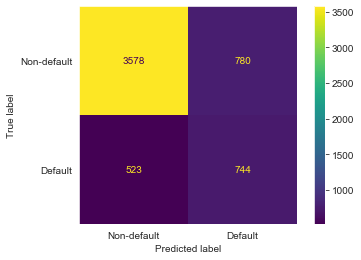

In [461]:
# confusion matrix for test set

plot_confusion_matrix(log_reg, X_test, y_test, display_labels=["Non-default", "Default"],
                      values_format=".5g")
plt.grid(False) # removes the annoying grid lines from plot
plt.show()


## Feature Selection

In [380]:
lr = LogisticRegression()
selector = RFECV(estimator=lr, step=1, cv=5, scoring='f1', n_jobs=-1, verbose=1)
selector.fit(X_train, y_train)
rfe_features = X.columns[(selector.get_support())]

Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.


In [235]:
X.columns[(selector.get_support())]

Index(['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt4', 'bill_amt5',
       'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt6',
       'avg_income_age', 'avg_income_edu', 'pay_sum', 'bill_diff_pay',
       'bill_diff_pay_min_limit', 'avg_income', 'education_1', 'education_2',
       'education_3', 'marriage_1', 'marriage_2', 'marriage_3', 'pay_0_-2',
       'pay_0_0', 'pay_0_1', 'pay_0_2', 'pay_0_3', 'pay_0_4', 'pay_0_5',
       'pay_0_6', 'pay_0_7', 'pay_0_8', 'pay_2_-2', 'pay_2_0', 'pay_2_1',
       'pay_2_2', 'pay_2_4', 'pay_2_5', 'pay_2_6', 'pay_3_-2', 'pay_3_0',
       'pay_3_1', 'pay_3_2', 'pay_3_3', 'pay_3_5', 'pay_3_6', 'pay_3_8',
       'pay_4_-2', 'pay_4_1', 'pay_4_2', 'pay_4_5', 'pay_4_6', 'pay_4_7',
       'pay_4_8', 'pay_5_0', 'pay_5_2', 'pay_5_3', 'pay_5_4', 'pay_5_6',
       'pay_5_7', 'pay_6_0', 'pay_6_2', 'pay_6_3', 'pay_6_4', 'pay_6_7',
       'pay_6_8'],
      dtype='object')

Decided to stick with all features.

### GridSearch Logistic Regression

In [381]:
# create parameter list for logistic regression model
params_dict_log={
           'C': np.logspace(-1,1,5),
           'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
            }

In [382]:
# instantiate gridsearch
grid_log = GridSearchCV(log_reg, params_dict_log, cv=5, scoring='f1', verbose=1, n_jobs=-1)

In [383]:
# refit to data
grid_log.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   34.0s finished


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          fit_intercept=False, n_jobs=-1,
                                          random_state=1, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([ 0.1       ,  0.31622777,  1.        ,  3.16227766, 10.        ]),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1', verbose=1)

In [384]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_log.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_log.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_log.best_estimator_)

0.5348177842685801
{'C': 10.0, 'solver': 'lbfgs'}
LogisticRegression(C=10.0, class_weight='balanced', fit_intercept=False,
                   n_jobs=-1, random_state=1)


Will stick with first Logistic Regression model as it has higher f1 score.

### KNN

In [236]:
# instantiate a KNN model
knn = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)

# fit the model to training
knn.fit(X_train, y_train)


# predict on training and test set
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

In [237]:
print('Training Precision: ', precision_score(y_train, y_pred_train_knn))
print('Testing Precision: ', precision_score(y_test, y_pred_test_knn))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_pred_train_knn))
print('Testing Recall: ', recall_score(y_test, y_pred_test_knn))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_pred_train_knn))
print('Testing Accuracy: ', accuracy_score(y_test, y_pred_test_knn))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_pred_train_knn))
print('Testing F1-Score: ', f1_score(y_test, y_pred_test_knn))

Training Precision:  0.708909004287756
Testing Precision:  0.6563814866760168



Training Recall:  0.3956394575910662
Testing Recall:  0.36937647987371747



Training Accuracy:  0.8290861680692189
Testing Accuracy:  0.8144



Training F1-Score:  0.5078498293515359
Testing F1-Score:  0.4727272727272728


In [73]:
# create parameter dictionary for knn
params_dict_knn = {
    'n_neighbors': [3,5,11,19],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

In [237]:
# instantiate GridSearch
grid_knn = GridSearchCV(knn, params_dict_knn, verbose=1, cv = 5, n_jobs=-1, scoring='f1')

In [238]:
# fit to data
grid_knn.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.0min finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1, n_neighbors=9),
             n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=1)

In [239]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_knn.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_knn.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_knn.best_estimator_)

0.44314445271522224
{'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}
KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=19,
                     weights='distance')


In [240]:
# instantiate a KNN model
knn_fin = KNeighborsClassifier(n_neighbors=11, n_jobs=-1, weights='distance', metric='euclidean')

# fit the model to training
knn_fin.fit(X_train, y_train)


# predict on training and test set
y_pred_train_knn = knn_fin.predict(X_train)
y_pred_test_knn = knn_fin.predict(X_test)

In [241]:
print('Training F1-Score: ', f1_score(y_train, y_pred_train_knn))
print('Testing F1-Score: ', f1_score(y_test, y_pred_test_knn))

Training F1-Score:  0.9990685296074517
Testing F1-Score:  0.4535240040858018


Decide to stick with first KNN model as higher f1 score.

### Decision Tree Classifier

In [242]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(
    class_weight='balanced')

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

#predict the training set
y_pred_train_dtc = dtc.predict(X_train)

#Predict the response for test dataset
y_pred_test_dtc = dtc.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",f1_score(y_train, y_pred_train_dtc))
print("Testing F1 Score:",f1_score(y_test, y_pred_test_dtc))

Training F1 Score: 0.9990702616549343
Testing F1 Score: 0.3982785602503912


In [243]:
# parameter dict 
params_dict_dtc = {
    'max_depth': range(1,21,1),
    'criterion':['gini', 'entropy'],
    'min_samples_split': range(1,11,1)
}

In [244]:
# instantiate gridsearch
grid_tree = GridSearchCV(dtc, params_dict_dtc, cv=10, scoring='f1', verbose=1, n_jobs=-1)

# fit GridSearch to data
grid_tree.fit(X_train, y_train)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 770 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 1570 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2120 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2770 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3520 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  5.4min finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 21),
                         'min_samples_split': range(1, 11)},
             scoring='f1', verbose=1)

In [245]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.5232494997510124
{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 6}
DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=6)


In [238]:
# fit gridsearch DTC model
dtc_fin = DecisionTreeClassifier(
    criterion='gini', max_depth=6, 
    min_samples_split=6, class_weight='balanced')

# Train Decision Tree Classifer
dtc_fin = dtc_fin.fit(X_train,y_train)

#predict the training set
y_pred_train_dtc_fin = dtc_fin.predict(X_train)

#Predict the response for test dataset
y_pred_test_dtc_fin = dtc_fin.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",f1_score(y_train, y_pred_train_dtc_fin))
print("Testing F1 Score:",f1_score(y_test, y_pred_test_dtc_fin))

Training F1 Score: 0.5433108758421559
Testing F1 Score: 0.5161521895190238


### Random Forest Classifier

In [247]:
rfc = RandomForestClassifier(
    random_state = 1, 
    n_estimators=100, 
    max_depth=4, 
    max_features='sqrt',
    min_samples_leaf=2,
    criterion='entropy',
    class_weight='balanced')

In [248]:
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, max_features='sqrt', min_samples_leaf=2,
                       random_state=1)

In [249]:
rfc_preds = rfc.predict(X_test)

In [250]:
rfc_f1 = f1_score(y_test, rfc_preds)
rfc_f1

0.5421686746987951

In [107]:
# params grid
params_dict_for = { 
    'criterion' : ['gini', 'entropy'],
    'max_depth': range(2,5),
    'n_estimators': [500,700],
    'min_samples_leaf' : range(2,4),
    'max_features': ['auto', 5, 6, None, 0.08]
}

# forest_grid_params = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': range(2,5),
#     'min_samples_leaf': range(2,10,2),
#     'max_features' : [5, 'sqrt', 10, 15, 20, 30]
# }

In [108]:
# gridsearch rfc
grid_forest = GridSearchCV(RandomForestClassifier(), params_dict_for, cv=5, scoring='f1', verbose=1, n_jobs=-1)

In [109]:
grid_forest.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 22.4min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 5),
                         'max_features': ['auto', 5, 6, None, 0.08],
                         'min_samples_leaf': range(2, 4),
                         'n_estimators': [500, 700]},
             scoring='f1', verbose=1)

In [110]:
# Single best score achieved across all params (min_samples_split)
print(grid_forest.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_forest.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_forest.best_estimator_)
#Identify the best score during fitting with cross-validation


0.4240496564427083
{'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'n_estimators': 700}
RandomForestClassifier(max_depth=3, max_features=None, min_samples_leaf=2,
                       n_estimators=700)


In [146]:
rfc_fin = RandomForestClassifier(
    random_state = 1, 
    n_estimators=700, 
    max_depth=3, 
    max_features=None,
    min_samples_leaf=2,
    criterion='gini',
    class_weight='balanced')

In [147]:
rfc_fin.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, max_features=None,
                       min_samples_leaf=2, n_estimators=700, random_state=1)

In [148]:
rfc_preds = rfc.predict(X_test)

In [149]:
rfc_f1 = f1_score(y_test, rfc_preds)
rfc_f1

0.5421686746987951

### Combine models using Voting Classifier

In [239]:
voting_clf = VotingClassifier(
                estimators=[('logreg', log_reg), ('knn', knn), ('decisiontree', dtc_fin)], 
                voting='hard')

voting_clf.fit(X_train, y_train)

vc_preds = voting_clf.predict(X_test)

vc_f1 = f1_score(y_test, vc_preds)

print(vc_f1)

0.5420184961801368


Random Forest bought voting classifier down, therefore sticking with a Logistic Regression, KNN and DTC mix.

## Final Model

### Refit final model to the entire data set

In [462]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22499 entries, 28835 to 7624
Data columns (total 67 columns):
limit_bal                  22499 non-null float64
age                        22499 non-null int64
bill_amt1                  22499 non-null float64
bill_amt2                  22499 non-null float64
bill_amt4                  22499 non-null float64
bill_amt5                  22499 non-null float64
bill_amt6                  22499 non-null float64
pay_amt1                   22499 non-null float64
pay_amt2                   22499 non-null float64
pay_amt3                   22499 non-null float64
pay_amt6                   22499 non-null float64
avg_income_age             22499 non-null object
avg_income_edu             22499 non-null object
pay_sum                    22499 non-null float64
bill_diff_pay              22499 non-null float64
bill_diff_pay_min_limit    22499 non-null float64
avg_income                 22499 non-null float64
education_1                22499 non-null uint8

In [463]:
log_reg.fit(X, y)

LogisticRegression(class_weight='balanced', fit_intercept=False, n_jobs=-1,
                   random_state=1, solver='liblinear')

In [464]:
# scale data to entire dataset
scaler.fit(X)

StandardScaler()

In [465]:
# export scalar for holdout set
pickle_out = open('lrscaler.pickle', 'wb')
pickle.dump(scaler, pickle_out)
pickle_out.close()

In [466]:
# export final model for holdout set
pickle_out = open('lrmodel.pickle', 'wb')
pickle.dump(log_reg, pickle_out)
pickle_out.close()